# TTDS: Lab 1- Preprocession
![](images/indexProcess.png)

Download the following files: 
- Collection 1 --> Bible: (https://opencourse.inf.ed.ac.uk/sites/default/files/https/opencourse.inf.ed.ac.uk/ttds/2023/pg10.txt) 
- Collection 2 --> Quran English translation: (https://opencourse.inf.ed.ac.uk/sites/default/files/https/opencourse.inf.ed.ac.uk/ttds/2023/quran.txt)
- Collection 3 --> Wikipedia abstracts: (https://homepages.inf.ed.ac.uk/wmagdy/Resources/ttds/abstracts.wiki.txt.gz)
(note: if the downloaded abstracts.wiki.txt.gz file size is over 470MB, then it should be uncompressed already. Just rename it to .txt file without the need to uncompress it).

In [ ]:
wget [link]

Write code to do the following: 
- Tokenisation: convert text into tokens with no punctuations 
- Case folding: make all text into lower case 
- Stopping: remove English stop words 
- Normalisation: Porter stemmer at least. You can try other stemmers as well.
-
You can get Porter stemmer in Perl or Python, or you can use Snowball Stemmer for multiple languages.

In [1]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def preprocess_text(text, lang='english'):
    #tokenization
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in string.punctuation]
    #casefolding
    tokens = [t.lower() for t in tokens]
    #stopping
    try:
        stop_words = set(stopwords.words(lang))
    except OSError:
        stop_words = set()
        
    tokens = [t for t in tokens if t not in stop_words]
    #normalization
    stemmer = SnowballStemmer(lang)
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens
print(preprocess_text("That U.S.A. poster-print costs $12.40, isn't it amazing?", "english"))

# 示例：西班牙语
print(preprocess_text("Los niños están jugando en el parque.", "spanish"))

# 示例：德语
print(preprocess_text("Die Kinder spielen im Garten.", "german"))

['u.s.a.', 'poster-print', 'cost', '12.40', "n't", 'amaz']
['niñ', 'jug', 'parqu']
['kind', 'spiel', 'gart']


In [5]:
import os
print(os.getcwd())

/home/jovyan/TTDS/Lab/Lab1


In [14]:
inputPath="quran.txt"
outputPath="quran_preprocess.txt"
with open(inputPath,"r",encoding="utf-8") as f:
    text=f.read()
tokens = preprocess_text(text,"english")
with open(outputPath, "w", encoding="utf-8") as f:
    for token in tokens:
        f.write(token + "\n")

# 😁 wiki 470mb不能一次性读入一次性tokenize 不然kernel会崩
只能一行一行处理😁😯🦆

In [4]:
import gzip
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
#initiate tokenizer stopwords and stemmer only once
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer('english')
def preprocess_line(text):
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

def process_file(input_file, output_file, lang='english'):
    with gzip.open(input_file,"rt", encoding="utf-8") as fin, \
        open(output_file, "w", encoding="utf-8") as fout:
        for line in fin:
            tokens = preprocess_line(line)
            if tokens:
                for token in tokens:
                    fout.write(token+"\n")

In [ ]:
inputPath="abstracts.wiki.txt.gz"
outputPath="wiki_preprocess.txt"

process_file(inputPath,outputPath)

Discuss with your colleagues, what kind of modifications in preprocessing could be applied. For example: 
- Additional words/terms to be filtered outline 
- Special tokenisation 
- Additional normalisation to some terms

# Word Laws
- Print the unique terms with frequency, then plot them in a log-log graph. Report with your friends what you notice on Zipf's law
- Plot the distribution of the first digit in frequences obtained and observe Beford's law. Try again while neglecting the one digit frequencies (frequencies less than 10), and check if the law still applies.
Plot the growth of vocabulary while you go through the collection and observe Heap's law. Try to fit the law to you graph and report the best fitting k and b constants. 
Advice on how to implement: 
- read text file term by term. count n (the number of terms read). 
- save new terms in a hash as you go in reading the file. With each new term update the vocabulray size v. 
- print the values of n and v every while. Plot n vs v at the end. 
- try to fit an equation v = k.n^b. Report best fitting k and b.

# 1.zipf's Law

In [2]:
#zipf's law
from tqdm import tqdm
from collections import Counter
def compute_frequency(filename):
    count = {}
    with open(filename, "r", encoding="utf-8") as f:
        for token in tqdm(f):
            token = token.strip()
            if token:  # 避免空行
                if token not in count:
                    count[token] = 1
                else:
                    count[token] += 1
    return count

counter_bible = compute_frequency("pg10_preprocess.txt")
print(Counter(counter_bible).most_common(20))


409787it [00:00, 2276328.27it/s]

[('shall', 9840), ('unto', 8997), ('lord', 8007), ('thou', 5474), ('god', 4728), ('thi', 4600), ('said', 3999), ('ye', 3983), ('thee', 3826), ('son', 3486), ('king', 2891), ('upon', 2750), ('man', 2735), ('day', 2615), ('israel', 2575), ('say', 2532), ('hath', 2264), ('hous', 2160), ('peopl', 2148), ('came', 2093)]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
def plot_zipf(counter, language):
    ''' Takes a dictionary of word counts, and a string with the language name.
    Produces a Zipf plot (rank vs frequency, on log scales) '''
    freqs = np.array(sorted(counter.values(), reverse=True))
    ranks = np.arange(1, len(freqs) + 1)

    plt.figure(figsize=(4.5, 4.5))
    plt.plot(ranks, freqs, linewidth=3)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, 1.5e6)
    plt.ylim(1, 1.5e6)
    plt.grid(True, which="both", ls="--")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.title(f"Zipf Plot for " + language)
    plt.show()



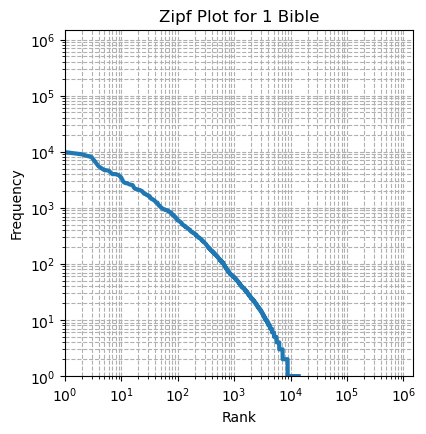

In [5]:
plot_zipf(counter_bible, "1 Bible")

66825it [00:00, 2309604.51it/s]


[('allah', 2739), ('shall', 1281), ('lord', 967), ('say', 861), ('believ', 761), ('said', 617), ('day', 514), ('know', 460), ('us', 440), ('punish', 387), ('earth', 381), ('inde', 380), ('upon', 370), ('peopl', 369), ('except', 367), ('messeng', 365), ('sure', 354), ('nation', 345), ('merci', 333), ('would', 331)]


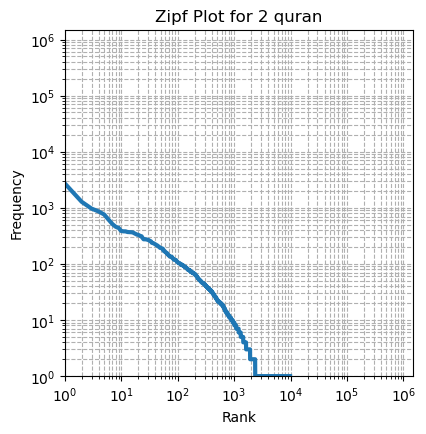

In [6]:
counter_quran = compute_frequency("quran_preprocess.txt")
print(Counter(counter_quran).most_common(20))
plot_zipf(counter_quran, "2 quran")

8380194it [00:04, 1930622.93it/s]


[('quot', 110228), ('refer', 65859), ('may', 64202), ('state', 39159), ('name', 35401), ('use', 34273), ('unit', 34114), ('thumb', 33602), ('also', 31563), ('known', 31561), ('one', 30841), ('first', 26374), ('american', 26357), ('right', 24009), ('born', 23386), ('new', 21598), ('locat', 17743), ('two', 16851), ('includ', 16776), ('year', 16321)]


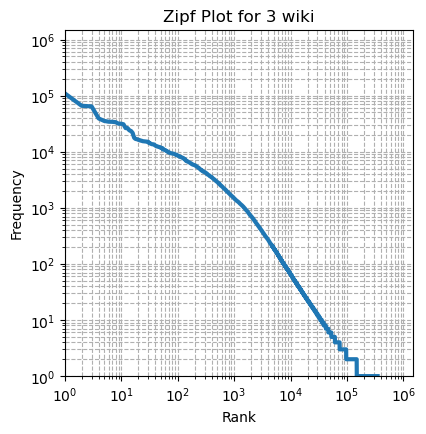

In [24]:
counter_wiki= compute_frequency("wiki_preprocess.txt")
print(Counter(counter_wiki).most_common(20))
plot_zipf(counter_wiki, "3 wiki")

# 2.Beford's law
P(d)=log(1+1/d),d=1,2,...,9

In [25]:
import math
import matplotlib.pyplot as plt

def first_digit(n):
    """返回整数 n 的首位数字"""
    while n >= 10:
        n //= 10
    return n
def Benford_real(counter, title):
    freqs=list(counter.values())
    digits={d:0 for d in range(1,10)}
    
    for freq in freqs:
        if freq > 0:
            d = first_digit(freq)
            digits[d]+=1
    
    total= sum(digits.values())
    
    digit_dist = {d: c /total for d,c in digits.items()}
    benford_dist = {d:math.log10(1+1/d) for d in range(1,10)}
    # 画图
    plt.figure(figsize=(8,6))
    plt.bar(digit_dist.keys(), digit_dist.values(), alpha=0.6, label="Observed")
    plt.plot(benford_dist.keys(), benford_dist.values(), "ro-", label="Benford Law")
    plt.xlabel("Leading Digit")
    plt.ylabel("Probability")
    plt.title("Benford's Law Test on Word Frequencies:"+title)
    plt.legend()
    plt.show()

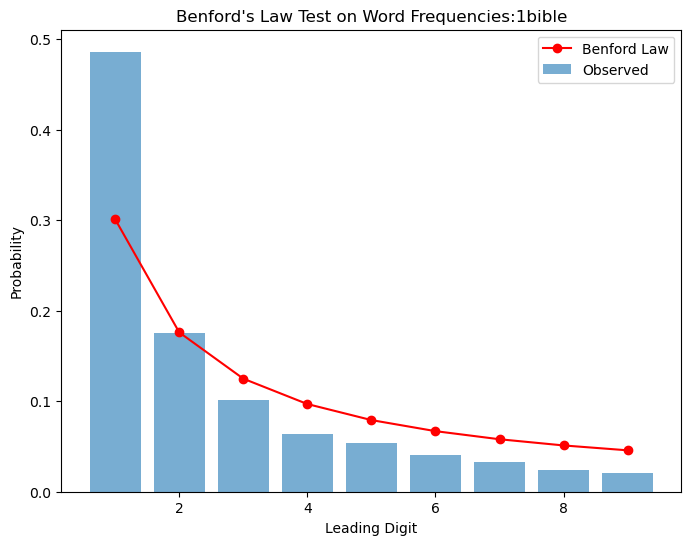

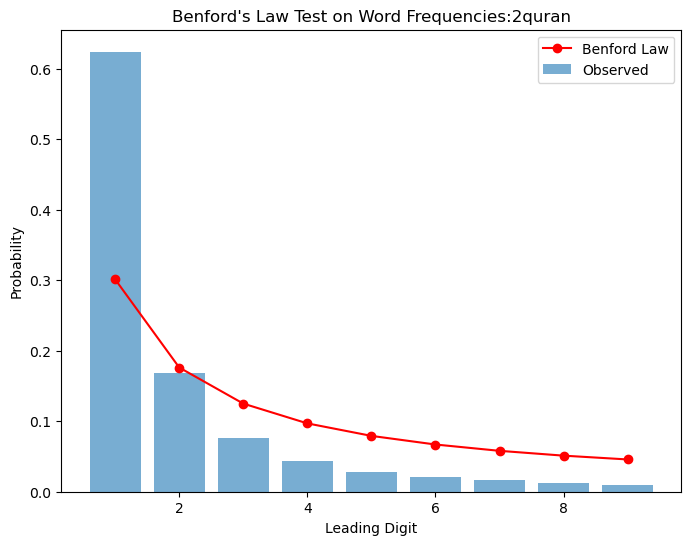

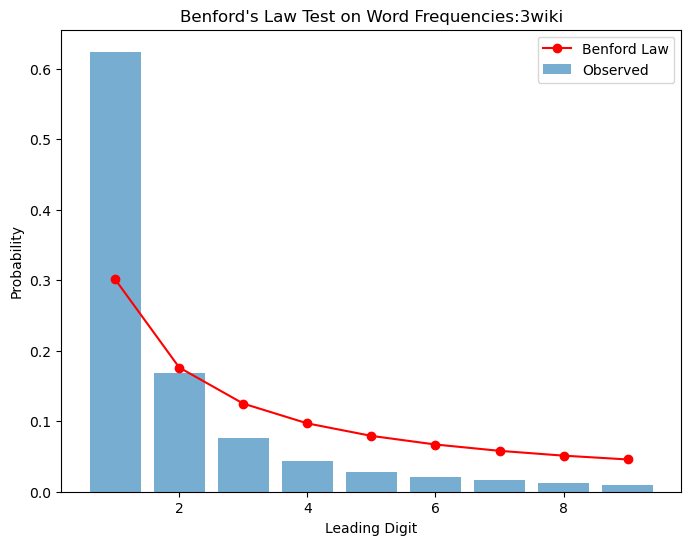

In [27]:
Benford_real(counter_bible,"1bible")
Benford_real(counter_quran,"2quran")
Benford_real(counter_wiki,"3wiki")

# 3.heap‘s Law

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
def heaps_func(n, k, b):
    """Heap's law: V = k * n^b"""
    return k * (n**b)
def compute_heaps(filename, sample_step=10000):
    vocab = set()
    n_values, v_values = [], []
    n = 0
    with open(filename,"r") as f:
        for token in tqdm(f):
            token=token.strip()
            if not token:
                continue
            n+=1
            vocab.add(token)
            if n%sample_step==0:
                n_values.append(n)
                v_values.append(len(vocab))
    return n_values,v_values
def plot_heaps(n_values, v_values, k, b, loglog=False):
    """
    绘制 Heap's law 曲线
    loglog=True 时使用对数坐标
    """
    v_fit = heaps_func(n_values, k, b)

    plt.figure(figsize=(8,6))
    if loglog:
        plt.loglog(n_values, v_values, "b.", label="Observed")
        plt.loglog(n_values, v_fit, "r-", label=f"Fitted Heap's law (k={k:.2f}, b={b:.2f})")
    else:
        plt.plot(n_values, v_values, "b.", label="Observed")
        plt.plot(n_values, v_fit, "r-", label=f"Fitted Heap's law (k={k:.2f}, b={b:.2f})")

    plt.xlabel("Number of tokens (n)")
    plt.ylabel("Vocabulary size (V)")
    plt.title("Heap's Law")
    plt.legend()
    plt.show()
def heaps_law_pipeline(filename, sample_step=10000, loglog=False):
    """
    一键运行 Heap's law 分析:
    1. 读取文件
    2. 统计 n, V
    3. 拟合 k, b
    4. 绘制结果
    """
    n_values, v_values = compute_heaps(filename, sample_step=sample_step)
    k, b = fit_heaps(n_values, v_values)
    print(f"最佳拟合参数: k = {k:.3f}, b = {b:.3f}")
    plot_heaps(n_values, v_values, k, b, loglog=loglog)
    return k, b
def fit_heaps(n_values, v_values):
    """
    用 curve_fit 拟合 Heap's law，返回最佳 k, b
    """
    params, _ = curve_fit(heaps_func, n_values, v_values, maxfev=10000)
    k, b = params
    return k, b

409787it [00:00, 2592442.53it/s]


最佳拟合参数: k = 15.478, b = 0.528


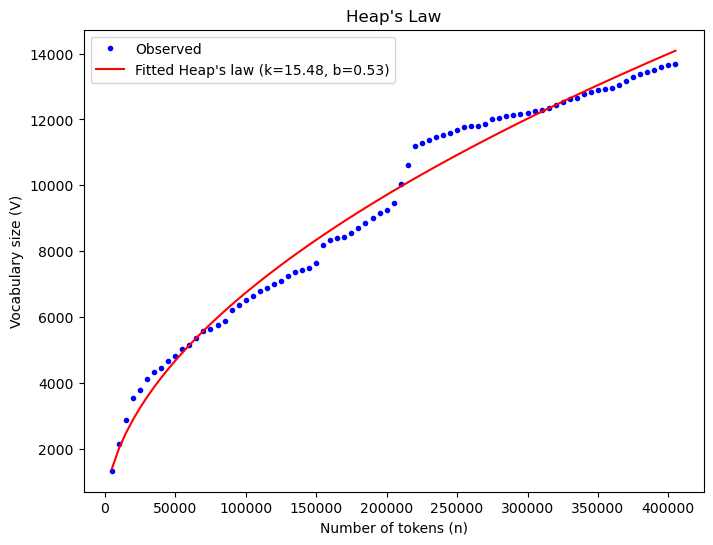

66825it [00:00, 2693643.35it/s]


最佳拟合参数: k = 0.819, b = 0.840


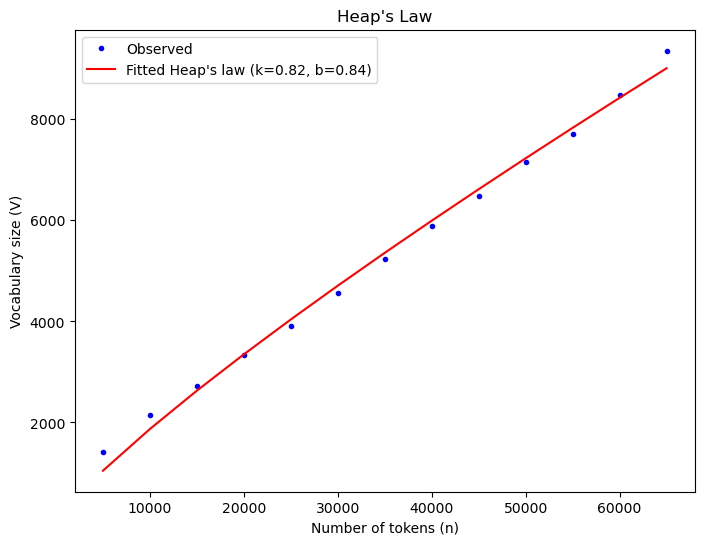

8380194it [00:03, 2203451.34it/s]


最佳拟合参数: k = 2.631, b = 0.740


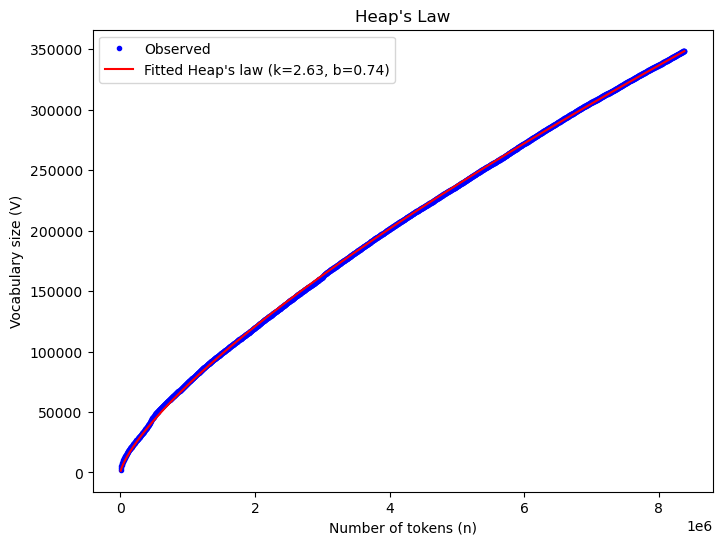

In [39]:
filename = "pg10_preprocess.txt"  # 每行一个 token
k, b = heaps_law_pipeline(filename, sample_step=5000, loglog=False)
filename = "quran_preprocess.txt"  # 每行一个 token
k, b = heaps_law_pipeline(filename, sample_step=5000, loglog=False)
filename = "wiki_preprocess.txt"  # 每行一个 token
k, b = heaps_law_pipeline(filename, sample_step=5000, loglog=False)